# 2_ctx_th_connection_and_th_gene_pc1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
from scipy.stats import pearsonr

import warnings
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

th_regions = ['AD', 'AMd', 'AMv', 'AV', 'CL', 'CM', 'IAD', 'IAM', 'IGL', 'IMD', 'LD', 'LGv', 'LH', 'LP', 'MD', 'MGd', 'MGm', 'MGv', 'MH', 'PCN', 'PF', 'PIL', 'PO', 'POL',
                'PP', 'PR', 'PT', 'PVT', 'PoT', 'RE', 'RH', 'RT', 'SGN', 'SMT', 'SPA', 'SPFm', 'SPFp', 'VAL', 'VM', 'VPL', 'VPLpc', 'VPM', 'VPMpc', 'Xi']
ctx_regions = ['ACAd', 'ACAv', 'AId', 'AIp', 'AIv', 'AUDd', 'AUDp', 'AUDpo',
                'AUDv', 'ECT', 'FRP', 'GU', 'ILA', 'MOp', 'MOs', 'ORBl', 'ORBm',
                'ORBvl', 'PERI', 'PL', 'RSPagl', 'RSPd', 'RSPv', 'SSp-bfd',
                'SSp-ll', 'SSp-m', 'SSp-n', 'SSp-tr', 'SSp-ul', 'SSp-un', 'SSs',
                'TEa', 'VISC', 'VISa', 'VISal', 'VISam', 'VISl', 'VISli', 'VISp',
                'VISpl', 'VISpm', 'VISpor', 'VISrl']


In [2]:
adata_sc = sc.read_h5ad('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/adata_processed.h5ad')
allen_region = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/allen_region.csv')
adata_sc.obs['region'] = allen_region['region'].values
# add cell type
meta = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/cell_metadata_with_cluster_annotation.csv')
meta = meta.set_index('cell_label')
meta = meta.loc[adata_sc.obs.index.to_list()]
adata_sc.obs['cell_type'] = meta['class'].to_list()
adata_sc.obs['cell_subtype'] = meta['subclass'].to_list()
adata_sc.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type,cell_subtype
cell_label,,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,49.206853,44.877634,12.168155,4.920685,4.487763,1.216815,SSs1,33 Vascular,333 Endo NN
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,48.973992,44.813761,12.179006,4.897399,4.481376,1.217901,SSs1,33 Vascular,333 Endo NN
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,48.791066,44.577722,12.192707,4.879107,4.457772,1.219271,SSs1,33 Vascular,330 VLMC NN
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,48.830489,44.426120,12.195078,4.883049,4.442612,1.219508,SSs1,33 Vascular,329 ABC NN
131102494428104399865219008178262036485,Zhuang-ABCA-3.023,48.308843,43.028156,12.267879,4.830884,4.302816,1.226788,SSs1,34 Immune,334 Microglia NN
...,...,...,...,...,...,...,...,...,...,...
318102106429791409781741726367984532777,Zhuang-ABCA-3.009,131.090716,69.334275,41.436743,13.109072,6.933427,4.143674,MDRNd,30 Astro-Epen,318 Astro-NT NN
35262847161560382172299767067854387528,Zhuang-ABCA-3.009,131.216032,69.494070,41.351034,13.121603,6.949407,4.135103,MDRNd,33 Vascular,333 Endo NN
75415866509570969932943497000463821106,Zhuang-ABCA-3.009,131.415152,70.764504,40.800403,13.141515,7.076450,4.080040,sctd,24 MY Glut,257 SPVC Ccdc172 Glut


In [3]:
adata_sc_sel = adata_sc[adata_sc.obs['region'].isin(th_regions)]

# celltype
adata_sc_sel = adata_sc_sel[adata_sc_sel.obs['cell_type'].str.contains('Glut')]   #glut:11632, GABA:2144
# adata_sc_sel = adata_sc_sel[~((adata_sc_sel.obs['cell_type'].str.contains('Glut')) | (adata_sc_sel.obs['cell_type'].str.contains('GABA')))]

sc.pp.normalize_total(adata_sc_sel, target_sum=1e4)
sc.pp.log1p(adata_sc_sel)
adata_sc_sel.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type,cell_subtype
cell_label,,,,,,,,,,
161688747436026654650176510540392211433,Zhuang-ABCA-3.010,87.458311,42.561713,36.003462,8.745831,4.256171,3.600346,PP,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
58181776695022611014193138668092143421,Zhuang-ABCA-3.010,87.428665,43.141638,36.074035,8.742867,4.314164,3.607403,PP,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
44943142248653779447832011085753663887,Zhuang-ABCA-3.010,88.399417,38.509451,35.499828,8.839942,3.850945,3.549983,PIL,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
116752430110288879397639873888117102751,Zhuang-ABCA-3.010,88.055718,34.977674,35.215769,8.805572,3.497767,3.521577,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
90801153563202361546995315846250718208,Zhuang-ABCA-3.010,88.419023,34.479228,35.184868,8.841902,3.447923,3.518487,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
...,...,...,...,...,...,...,...,...,...,...
137125155786416424728071422508382942054,Zhuang-ABCA-3.009,86.480430,34.094203,37.248728,8.648043,3.409420,3.724873,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
186321231466624970722021094909324401885,Zhuang-ABCA-3.009,86.443977,35.015822,37.291043,8.644398,3.501582,3.729104,POL,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut
262284519603134366801326445274337827961,Zhuang-ABCA-3.009,86.388989,32.866518,37.212756,8.638899,3.286652,3.721276,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut


In [4]:
sc.tl.pca(adata_sc_sel)
adata_sc_sel.obs['pc1'] = adata_sc_sel.obsm['X_pca'][:, 0]

In [5]:
ctx2th_connection_strength = pd.read_csv('../data/ctx2th_connection_strength_for_th_single_cell.csv')
adata_sc_sel.obs['connection_strength'] = ctx2th_connection_strength['connection_strength'].values
adata_sc_sel.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type,cell_subtype,pc1,connection_strength
cell_label,,,,,,,,,,,,
161688747436026654650176510540392211433,Zhuang-ABCA-3.010,87.458311,42.561713,36.003462,8.745831,4.256171,3.600346,PP,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-18.752752,0.000148
58181776695022611014193138668092143421,Zhuang-ABCA-3.010,87.428665,43.141638,36.074035,8.742867,4.314164,3.607403,PP,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-17.124094,0.000148
44943142248653779447832011085753663887,Zhuang-ABCA-3.010,88.399417,38.509451,35.499828,8.839942,3.850945,3.549983,PIL,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-13.156902,0.000147
116752430110288879397639873888117102751,Zhuang-ABCA-3.010,88.055718,34.977674,35.215769,8.805572,3.497767,3.521577,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-15.346298,0.000100
90801153563202361546995315846250718208,Zhuang-ABCA-3.010,88.419023,34.479228,35.184868,8.841902,3.447923,3.518487,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-16.317265,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...
137125155786416424728071422508382942054,Zhuang-ABCA-3.009,86.480430,34.094203,37.248728,8.648043,3.409420,3.724873,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-15.591858,0.000108
186321231466624970722021094909324401885,Zhuang-ABCA-3.009,86.443977,35.015822,37.291043,8.644398,3.501582,3.729104,POL,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-19.282854,0.000072
262284519603134366801326445274337827961,Zhuang-ABCA-3.009,86.388989,32.866518,37.212756,8.638899,3.286652,3.721276,SGN,19 MB Glut,168 SPA-SPFm-SPFp-POL-PIL-PoT Sp9 Glut,-14.546726,0.000133


#### scanpy

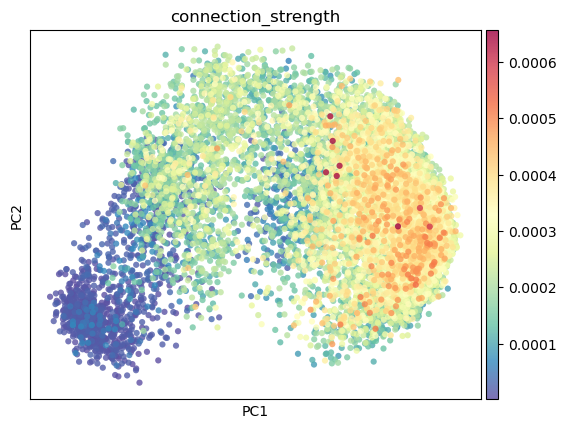

In [6]:
sc.pl.embedding(
    adata_sc_sel,
    basis="pca",
    color=["connection_strength"],
    color_map="Spectral_r",
    size=80,
    alpha=0.8
)

In [7]:
region_counts = adata_sc_sel.obs['region'].value_counts()
valid_labels = region_counts[region_counts >= 5].index

# 过滤原始 DataFrame
adata_sc_sel = adata_sc_sel[adata_sc_sel.obs['region'].isin(valid_labels)]
adata_sc_sel.obs['region'].astype(str)
adata_sc_sel

View of AnnData object with n_obs × n_vars = 11632 × 1122
    obs: 'brain_section_label', 'x', 'y', 'z', 'x_ccf', 'y_ccf', 'z_ccf', 'region', 'cell_type', 'cell_subtype', 'pc1', 'connection_strength'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

Text(0.5, 1.0, 'r = 0.6237,   p = 1.0214e-05')

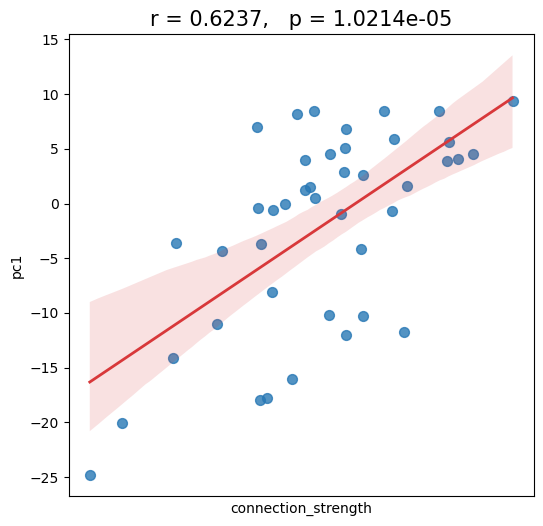

In [8]:
x = 'connection_strength'
y = 'pc1'

df = pd.DataFrame({x: adata_sc_sel.obs.groupby('region')[x].mean(),
                   y: adata_sc_sel.obs.groupby('region')[y].mean()})

plt.figure(figsize=(6,6))

ax = sns.regplot(data=df, x=x, y=y, scatter=True,
            scatter_kws={'s': 50, 'color': '#2878B5', 'alpha': 0.8, 'marker': 'o'},
            line_kws={'linewidth': 2, 'color': '#D8383A', 'linestyle': '-'})
corr, p = pearsonr(df[x], df[y])
plt.xticks([])
plt.title(f'r = {corr:.4},   p = {p:.5}', fontsize=15)

### gene fit

In [9]:
import scvelo as scv
adata_sc_sel.layers["spliced"] = adata_sc_sel.X
adata_sc_sel.layers["unspliced"] = adata_sc_sel.X
scv.tl.recover_dynamics(adata_sc_sel, n_jobs=100)
scv.tl.velocity(adata_sc_sel, mode="dynamical")
scv.tl.velocity_graph(adata_sc_sel, n_jobs=100)

recovering dynamics (using 100/192 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing neighbors


/mnt/Data16Tc/home/haichao/anaconda3/envs/SpaCon_test1/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


    finished (0:00:25) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 100/192 cores)
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


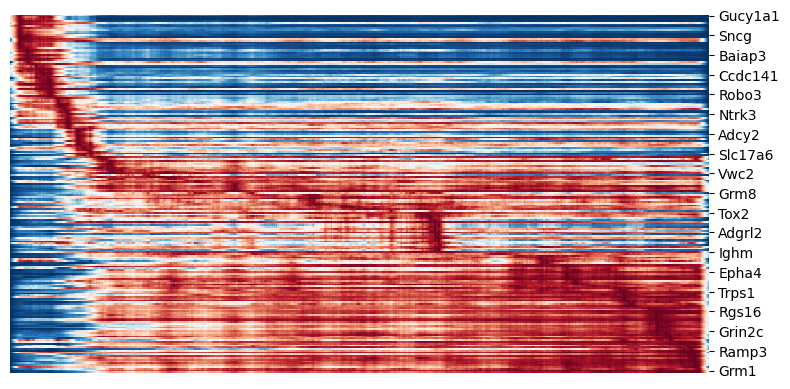

In [10]:
top_genes = adata_sc_sel.var['fit_likelihood'].sort_values(ascending=False).index[:200]
cm = scv.pl.heatmap(adata_sc_sel, var_names=top_genes, sortby='connection_strength', col_color=None, color_map='RdBu_r', n_convolve=300, sort=True, show=False)

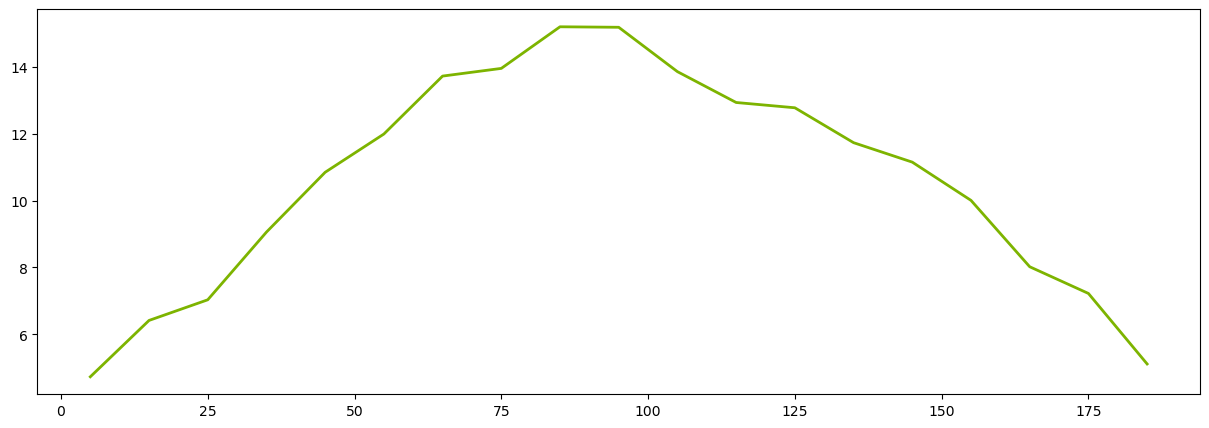

In [11]:
# 参数设置
group_size = 10  
window_size = 10  

# 分组计算函数
def group_differences(matrix, group_size):
    n_cells = matrix.shape[0]
    n_groups = n_cells // group_size
    
    # 初始化组间差异矩阵
    diffs = np.zeros(n_groups-1)
    
    for i in range(n_groups-1):
        # 提取相邻两组细胞（边界处理：丢弃不能成组的尾部细胞）
        group1 = matrix[i*group_size : (i+1)*group_size]
        group2 = matrix[(i+1)*group_size : (i+2)*group_size]
        
        # 计算组间差异（使用中位数降低异常值影响）
        median_diff = np.median(group2, axis=0) - np.median(group1, axis=0)
        diffs[i] = np.linalg.norm(median_diff)
    
    return diffs

# 执行分组差异计算
smoothed_exp = cm.data2d.values
cell_diffs = group_differences(smoothed_exp, group_size)

# 滑动窗口平滑（自动适配组数）
valid_window = min(window_size, len(cell_diffs))
smoothed_diffs = np.convolve(cell_diffs, 
                            np.ones(valid_window)/valid_window, 
                            mode='same')  # 保持长度不变

# 可视化设置
plt.figure(figsize=(15, 5))
x_positions = np.arange(len(cell_diffs)) * group_size + group_size/2  # 标注组中心位置

plt.plot(x_positions, smoothed_diffs, 
        color='#7db400', 
        linewidth=2,
        label=f'Smoothed (window={valid_window})')

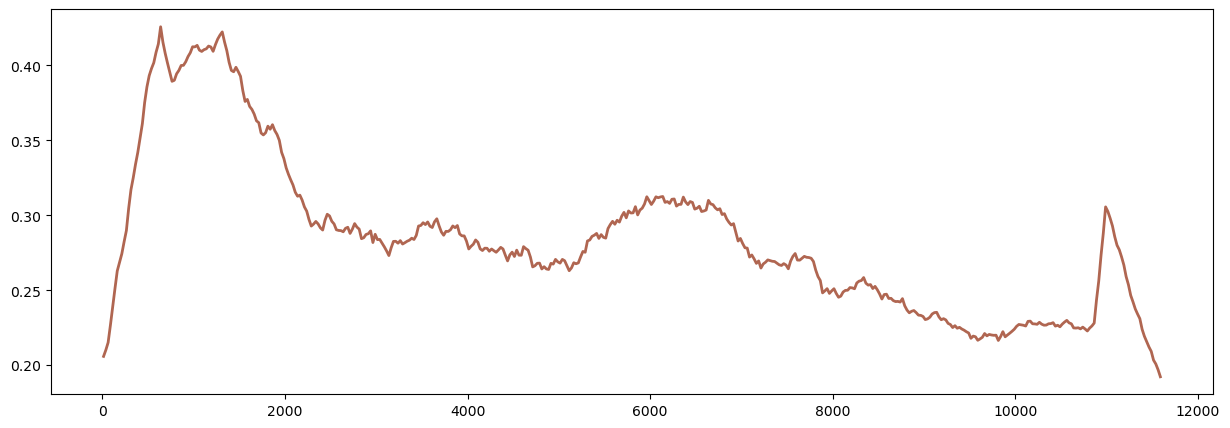

In [12]:
group_size = 25 
window_size = 50 

# 分组计算函数
def group_differences(matrix, group_size):
    n_cells = matrix.shape[0]
    n_groups = n_cells // group_size
    
    # 初始化组间差异矩阵
    diffs = np.zeros(n_groups-1)
    
    for i in range(n_groups-1):
        # 提取相邻两组细胞（边界处理：丢弃不能成组的尾部细胞）
        group1 = matrix[i*group_size : (i+1)*group_size]
        group2 = matrix[(i+1)*group_size : (i+2)*group_size]
        
        # 计算组间差异（使用中位数降低异常值影响）
        median_diff = np.median(group2, axis=0) - np.median(group1, axis=0)
        diffs[i] = np.linalg.norm(median_diff)
    
    return diffs

# 执行分组差异计算
smoothed_exp = cm.data2d.values.T
cell_diffs = group_differences(smoothed_exp, group_size)

# 滑动窗口平滑（自动适配组数）
valid_window = min(window_size, len(cell_diffs))
smoothed_diffs = np.convolve(cell_diffs, 
                            np.ones(valid_window)/valid_window, 
                            mode='same')  # 保持长度不变

# 可视化设置
plt.figure(figsize=(15, 5))
x_positions = np.arange(len(cell_diffs)) * group_size + group_size/2  # 标注组中心位置

plt.plot(x_positions, smoothed_diffs, 
        color='#b06651', 
        linewidth=2,
        label=f'Smoothed (window={valid_window})')